In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Seattle2014.csv")

In [3]:
data.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [4]:
data.shape

(365, 17)

In [5]:
data.columns

Index(['STATION', 'STATION_NAME', 'DATE', 'PRCP', 'SNWD', 'SNOW', 'TMAX',
       'TMIN', 'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT05', 'WT02',
       'WT03'],
      dtype='object')

In [6]:
rainfall = data["PRCP"]

In [7]:
rainfall.head()

0     0
1    41
2    15
3     0
4     0
Name: PRCP, dtype: int64

In [8]:
rainfall.values

array([  0,  41,  15,   0,   0,   3, 122,  97,  58,  43, 213,  15,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,  89, 216,   0,  23,  20,   0,   0,   0,   0,   0,   0,  51,
         5, 183, 170,  46,  18,  94, 117, 264, 145, 152,  10,  30,  28,
        25,  61, 130,   3,   0,   0,   0,   5, 191, 107, 165, 467,  30,
         0, 323,  43, 188,   0,   0,   5,  69,  81, 277,   3,   0,   5,
         0,   0,   0,   0,   0,  41,  36,   3, 221, 140,   0,   0,   0,
         0,  25,   0,  46,   0,   0,  46,   0,   0,   0,   0,   0,   0,
         5, 109, 185,   0, 137,   0,  51, 142,  89, 124,   0,  33,  69,
         0,   0,   0,   0,   0, 333, 160,  51,   0,   0, 137,  20,   5,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
         0,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  64,   0,   5,  36,  13,   0,
         8,   3,   0,   0,   0,   0,   0,   0,  18,  23,   0,   

In [9]:
rainfall.values.shape

(365,)

In [10]:
inches = rainfall/254 # convreting 1/mm => inches (1 inches = 25.4mm)

In [11]:
inches[:10]

0    0.000000
1    0.161417
2    0.059055
3    0.000000
4    0.000000
5    0.011811
6    0.480315
7    0.381890
8    0.228346
9    0.169291
Name: PRCP, dtype: float64

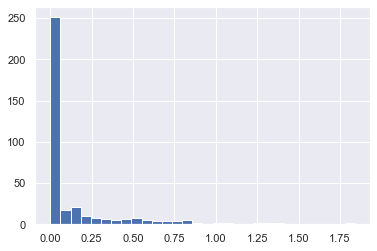

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles
plt.hist(inches, bins = 30); # beans defines the equal width bins in the range

In [13]:
np.sum((inches >= 0.5 )&(inches <= 1.0))

32

In [14]:
inches[(inches >= 0.5 )&(inches <= 1.0)]

10     0.838583
28     0.850394
40     0.720472
41     0.669291
47     0.570866
48     0.598425
54     0.511811
60     0.751969
62     0.649606
68     0.740157
86     0.870079
87     0.551181
106    0.728346
108    0.539370
111    0.559055
123    0.629921
127    0.539370
203    0.759843
223    0.500000
224    0.850394
265    0.720472
266    0.799213
290    0.590551
300    0.500000
302    1.000000
303    0.669291
324    0.598425
328    0.720472
343    0.511811
351    0.511811
353    0.771654
356    0.811024
Name: PRCP, dtype: float64

In [15]:
len(inches[(inches >= 0.5 )&(inches <= 1.0)])

32

In [16]:
np.sum(inches == 0) # Num of days without rain

215

In [17]:
np.sum(inches != 0) # Num of days with rain

150

In [18]:
np.sum(inches > 0.5) # Num of days with rain more than 0.5 inches

37

#### Uses of Boolean Masks:

In [19]:
rainy = (inches != 0)

In [20]:
rainy # rainy is the boolean mask and it mask out rainy day.

0      False
1       True
2       True
3      False
4      False
       ...  
360     True
361     True
362    False
363    False
364    False
Name: PRCP, Length: 365, dtype: bool

In [21]:
inches[rainy] # pick only rainy days

1      0.161417
2      0.059055
5      0.011811
6      0.480315
7      0.381890
         ...   
353    0.771654
356    0.811024
357    0.208661
360    0.129921
361    0.161417
Name: PRCP, Length: 150, dtype: float64

In [22]:
# Construct a mask of all summer days (June 21st is the 172nd days)
summer = (np.arange(365)-172 < 90)&(np.arange(365)-172 >0)

In [23]:
summer

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [24]:
# median of all the rainy days
inches[rainy]

1      0.161417
2      0.059055
5      0.011811
6      0.480315
7      0.381890
         ...   
353    0.771654
356    0.811024
357    0.208661
360    0.129921
361    0.161417
Name: PRCP, Length: 150, dtype: float64

In [25]:
np.median(inches[rainy])

0.19488188976377951

In [26]:
np.sum(summer)

89

In [27]:
np.median(inches[summer])

0.0

In [28]:
inches[summer]

173    0.000000
174    0.000000
175    0.000000
176    0.000000
177    0.070866
         ...   
257    0.000000
258    0.000000
259    0.019685
260    0.011811
261    0.000000
Name: PRCP, Length: 89, dtype: float64

In [29]:
np.sort(inches[summer])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
np.mean(inches[summer]) # mean of rainfall in summer

0.03251349199327612

In [31]:
np.max(inches[summer])

0.8503937007874016

In [32]:
np.min(inches[summer])

0.0

In [33]:
# Median rainfall non summer days 

In [34]:
~ summer

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [35]:
np.median(inches[~summer])

0.0

In [36]:
np.sort(inches[~summer])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
# Median of non  summer days with rain
np.median(inches[~summer & rainy])

0.20078740157480315

In [38]:
inches[~summer & rainy]

1      0.161417
2      0.059055
5      0.011811
6      0.480315
7      0.381890
         ...   
353    0.771654
356    0.811024
357    0.208661
360    0.129921
361    0.161417
Name: PRCP, Length: 136, dtype: float64

In [39]:
np.mean(inches[~summer & rainy])

0.3356009726725336